<a href="https://colab.research.google.com/github/AbrahamKong/CMPE257-NLP_AlternusVera/blob/master/AlternusVera_Corpis_Style_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Corpus Style 
    

### Team Contributions example:

|Features  |  Member |
|-----|-----|
| Feature name(s)                         |  Member name(s) |  
| Feature name(s)                 |  Member name(s) | 
| Feature name(s)                   |  Member name(s)  |   
| Feature name(s)                             |  Member name(s) |



#### What did I try and What worked? 

> Explain your work ...

#### What did not work?

> Explain your work ...


#### What alternatives did you try?

> Explain your work 

----

# Data Pre-process

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
file_path_data = "/content/drive/MyDrive/SJSU/CMPE 257: Machine Learning/NLP/AlternusVera/input_data"

In [3]:
your_team="Data Miners/NLP-Alternus Vera/input_data"
# file_path_data ="/content/drive/MyDrive/ML-Spring-2022/"+your_team
import os
os.chdir(file_path_data)

### Reading the Data

In [4]:
# !pip install selenium
# !pip install newspaper3k
# ! pip install beautifulsoup4
# ! pip install requests

In [5]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


# test_filename = 'input_data/dataset/test.tsv'
# train_filename = 'input_data/dataset/train.tsv'
# valid_filename = 'input_data/dataset/valid.tsv'

test_filename = file_path_data + '/test.tsv'
train_filename = file_path_data + '/train.tsv'
valid_filename = file_path_data + '/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


#### tweets from Donald Trump

In [8]:
tweets_filename = file_path_data + '/trump_tweets.csv'

trump_tweets = pd.read_csv(tweets_filename)

In [9]:
trump_tweets = trump_tweets.drop(columns=['id', 'isRetweet', 'isDeleted', 'device', 'favorites', 'retweets', 'isFlagged'])

In [10]:
trump_tweets = trump_tweets[trump_tweets["text"].str.startswith("http")==False]
# trump_tweets = trump_tweets[trump_tweets["text"].str.startswith("RT")==False]

In [11]:
trump_tweets

,text,date
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59
...,...,...
1492,I was thrilled to be back in my home state of ...,2020-10-29 19:49:09
1493,"Your VOTE on Tuesday, November 3rd is going to...",2020-10-29 19:54:59
1494,RT @christina_bobb: #truth,2020-12-06 05:51:02
1495,RT @christina_bobb: Rusty Bowers is intentiona...,2020-12-06 05:53:34


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

###  Putting It All Together 

To make the code reusable, we need to create a function that can be called many times.

In [12]:
def cleaning(raw_news):
    # import nltk
    # nltk.download('punkt')
    # nltk.download('wordnet')
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [13]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
import nltk
nltk.download('punkt')
nltk.download('wordnet')
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Time to clean, tokenize and stem train data: 
 10240 news: 0.3201730728149414 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.028322919209798177 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.030117642879486085 min


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [14]:
# model = gensim.models.KeyedVectors.load_word2vec_format('input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
model = gensim.models.KeyedVectors.load_word2vec_format((file_path_data + '/GoogleNews-vectors-negative300.bin.gz'), binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [15]:
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [16]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [17]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say anni list polit group support third trimest abort demand

Time to spell check the train data: 
 10240 news: 4.664127775033315 min

After: 
 say anni list polit group support third trimmest abort demand


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [18]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.5306412418683369 min


In [19]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.5953985055287679 min


##### Saved the trained dataset into a seperate CSV file 

In [20]:
# train_news.to_csv("input_data/train_processed.csv", sep=',')
# test_news.to_csv("input_data/test_processed.csv", sep=',')
# valid_news.to_csv("input_data/valid_processed.csv", sep=',')
train_news.to_csv((file_path_data + '/train_processed.csv'), sep=',')
test_news.to_csv((file_path_data + '/test_processed.csv'), sep=',')
valid_news.to_csv((file_path_data + '/valid_processed.csv'), sep=',')

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

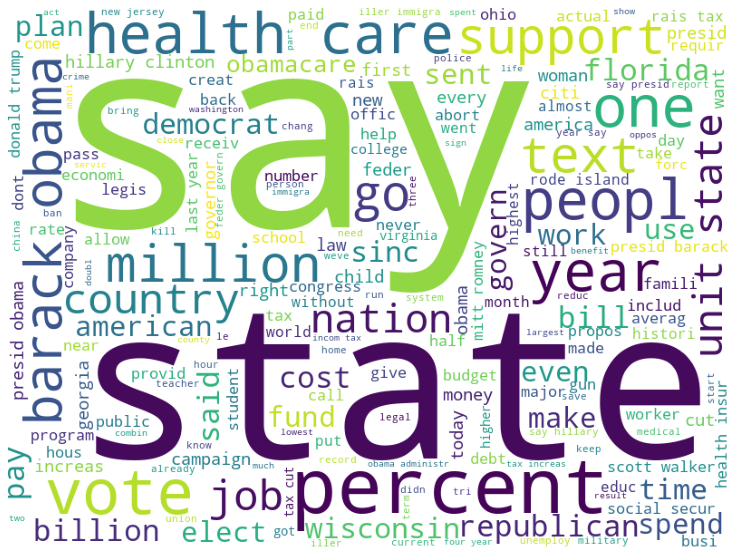

In [22]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

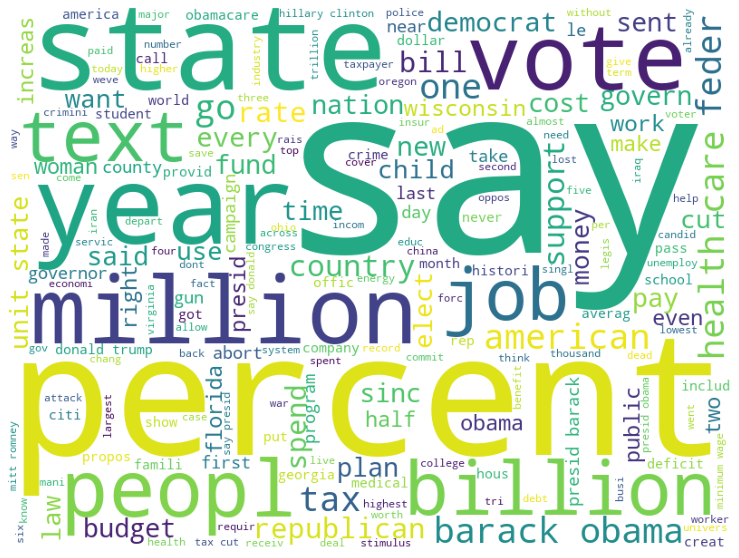

In [23]:
cloud(' '.join(test_news['clean']))

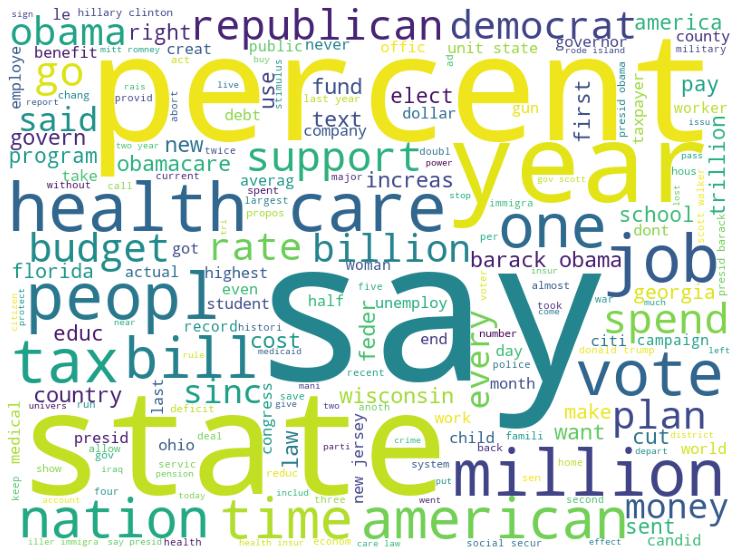

In [24]:
cloud(' '.join(valid_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus

# Feature: Corpus Structure

### Import necessary Libraries

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

### Import Data Set

In [26]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

train_news = pd.read_csv((file_path_data + '/train.tsv'), sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv((file_path_data + '/test.tsv'), sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv((file_path_data + '/valid.tsv'), sep='\t', names = colnames, error_bad_lines=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## New Data

In [27]:
# Data Cleaning has been performed above
trump_tweets

,text,date
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48
1,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59
...,...,...
1492,I was thrilled to be back in my home state of ...,2020-10-29 19:49:09
1493,"Your VOTE on Tuesday, November 3rd is going to...",2020-10-29 19:54:59
1494,RT @christina_bobb: #truth,2020-12-06 05:51:02
1495,RT @christina_bobb: Rusty Bowers is intentiona...,2020-12-06 05:53:34


In [28]:
trump_tweets['date'] = pd.to_datetime(trump_tweets['date'])

In [29]:
trump_tweets.sort_values(by='date')

,text,date
0,Republicans and Democrats have both created ou...,2011-08-02 18:07:48
1422,RT @Steverefresh: @dbongino They will take uni...,2019-05-01 10:08:02
1421,RT @GWKohn1: @dbongino None of the MEN I know ...,2019-05-01 10:08:56
1417,RT @SharylAttkisson: When did we quit teaching...,2019-05-04 12:14:05
1416,"RT @SharylAttkisson: When did we decide, as Am...",2019-05-04 12:15:09
...,...,...
277,Please support our Capitol Police and Law Enfo...,2021-01-06 19:38:58
300,I am asking for everyone at the U.S. Capitol t...,2021-01-06 20:13:26
311,These are the things and events that happen wh...,2021-01-06 23:01:04
323,"The 75,000,000 great American Patriots who vot...",2021-01-08 14:46:38


In [30]:
trump_tweets['label'] = 1

# News Scrapper

In [31]:
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

pagesToGet= 20

upperframe=[]  
for page in range(1,pagesToGet+1):
    # print('processing page :', page)
    url = 'https://www.politifact.com/factchecks/list/?page='+str(page)
    # print(url)
    
    #an exception might be thrown, so the code should be in a try-except block
    try:
        #use the browser to get the url. This is suspicious command that might blow up.
        page=requests.get(url)                             # this might throw an exception if something goes wrong.
    
    except Exception as e:                                   # this describes what to do if an exception is thrown
        error_type, error_obj, error_info = sys.exc_info()      # get the exception information
        print ('ERROR FOR LINK:',url)                          #print the link that cause the problem
        print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
        continue                                              #ignore this page. Abandon this and go back.
    time.sleep(2)   
    soup=BeautifulSoup(page.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    # print(len(links))
    filename="NEWS.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Statement,Link,Date, Source, Label\n"
    f.write(headers)
    
    for j in links:
        Statement = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Statement,Link,Date,Source,Label))
        f.write(Statement.replace(",","^")+","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+"\n")
    upperframe.extend(frame)
f.close()
politifact_df=pd.DataFrame(upperframe, columns=['Statement','Link','Date','Source','Label'])
politifact_df.head()

,Statement,Link,Date,Source,Label
0,Conservatives gained Twitter followers after t...,https://www.politifact.com/factchecks/2022/may...,"• May 2, 2022",Sean Hannity,false
1,Images show the Ukrainian flag being replaced ...,https://www.politifact.com/factchecks/2022/may...,"• May 2, 2022",Instagram posts,false
2,Jackie Chan is dead.,https://www.politifact.com/factchecks/2022/may...,"• May 2, 2022",Facebook posts,pants-fire
3,“The President of Ukraine owns a $35 million h...,https://www.politifact.com/factchecks/2022/may...,"• May 2, 2022",Facebook posts,false
4,Sen. Mark Kelly voted “for benefits to illegals.”,https://www.politifact.com/factchecks/2022/may...,"• May 2, 2022",National Republican Senatorial Committee,false


In [32]:
pd.unique(politifact_df['Label'])

array(['false', 'pants-fire', 'true', 'mostly-true', 'half-true',
       'barely-true', 'full-flop', 'half-flip'], dtype=object)

### Data Cleaning

In [33]:
def trueFalseLabel(r):
        '''
        Consider Original --	True, Mostly-tru, Half-true as True (1), 
        and Barely-true, False, Pants-fire, full-flop, half-flip as False (0)
        '''

        v = r['label']

        if (v == 'true'):
            return 1
        if (v == 'mostly-true'):
            return 1
        if (v == 'half-true'):
            return 1
        if (v == 'barely-true'):
            return 0
        if (v == 'half-flip'):
            return 0
        if (v == 'full-flop'):
            return 0
        if (v == 'false'):
            return 0
        if (v == 'pants-fire'):
            return 0
        if (v == 1):
            return 1
        if (v == 0):
            return 0

In [73]:
train_news['clean'] = train_news["headline_text"].apply(cleaning) 
                
test_news['clean'] = test_news["headline_text"].apply(cleaning)

valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

trump_tweets['clean'] = trump_tweets["text"].apply(cleaning)

politifact_df['clean'] = politifact_df["Statement"].apply(cleaning)

In [74]:
politifact_df.rename(columns={'Label': 'label'}, inplace=True)

In [75]:
train_news.columns

Index(['jsonid', 'label', 'headline_text', 'subject', 'speaker',
       'speakerjobtitle', 'stateinfo', 'partyaffiliation', 'barelytruecounts',
       'falsecounts', 'halftruecounts', 'mostlytrueocunts',
       'pantsonfirecounts', 'context', 'clean'],
      dtype='object')

In [76]:
trump_tweets.columns

Index(['text', 'date', 'label', 'clean'], dtype='object')

In [77]:
politifact_df.columns

Index(['Statement', 'Link', 'Date', 'Source', 'label', 'clean'], dtype='object')

In [78]:
temp1 = pd.concat([train_news, trump_tweets], sort=False)
train_final = pd.concat([temp1, politifact_df], sort=False)
# train_final = pd.concat([trump_tweets, politifact_df], sort=False)

In [79]:
train_final = train_final.drop(columns=['jsonid', 'headline_text', 'subject', 'speaker',
       'speakerjobtitle', 'stateinfo', 'partyaffiliation', 'barelytruecounts',
       'falsecounts', 'halftruecounts', 'mostlytrueocunts',
       'pantsonfirecounts', 'context', 'text', 'date', 'Statement', 'Link', 'Date', 'Source'])

In [80]:
train_final['clean'].isnull().values.any()

False

In [81]:
train_final = train_final.reset_index()

In [82]:
class CorpusStructure():
    
    def __init__(self):
        
        self.logistic_regression_pipeline = ''
        self.random_forest_pipeline = ''
        
    
    def trueFalseLabel(self, r):
        '''
        Consider Original --  True, Mostly-tru, Half-true as True (1), 
        and Barely-true, False, Pants-fire as False (0)
        '''

        v = r['label']

        if (v == 'true'):
            return 1
        if (v == 'mostly-true'):
            return 1
        if (v == 'half-true'):
            return 1
        if (v == 'barely-true'):
            return 0
        if (v == 'half-flip'):
            return 0
        if (v == 'full-flop'):
            return 0
        if (v == 'false'):
            return 0
        if (v == 'pants-fire'):
            return 0
        if (v == 1):
            return 1
        if (v == 0):
            return 0
    
    def logistic_regression_pipline(self, ngram_rg=(1,1)):
        '''
        Use TFiDF and Count Vector 
        '''
        tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=ngram_rg)
        count_vectorizer = CountVectorizer(ngram_range=ngram_rg)
        
        X = count_vectorizer.fit_transform(train_final['clean'])
        # Testing the ngram generation:
        print("Get first 20 feature names:\n")
        print(count_vectorizer.get_feature_names()[: 20])
        
        X_train = tfidf_vectorizer.fit_transform(train_final['clean'].values)
        X_test = tfidf_vectorizer.transform(test_news['clean'].values)
        
        train_final['Binary Label'] = train_final.apply(lambda row: self.trueFalseLabel(row), axis=1)
        test_news['Binary Label'] = test_news.apply(lambda row: self.trueFalseLabel(row), axis=1)

        y_train = train_final['Binary Label']
        y_test = test_news['Binary Label']
        
        self.logistic_regression_pipeline = Pipeline([
            ('vectorizer', tfidf_vectorizer),
            ('clf', LogisticRegression(penalty='l2', C=98.684210526315795))
            ])

        # print(X_train.shape)
        # print(y_train.shape)

        self.logistic_regression_pipeline.fit(train_final['clean'].values, y_train)
        predicts = self.logistic_regression_pipeline.predict(test_news['clean'].values)
        score = metrics.accuracy_score(y_test, predicts)
        print("Accuracy:   %0.5f" % score)
        
        
    def logistic_regression_predict(self, text):
        predicted = self.logistic_regression_pipeline.predict([text])
        predicedProb = self.logistic_regression_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    def random_forest_pipline(self, ngram_rg=(2, 2)):
                
        tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=ngram_rg)
        count_vectorizer = CountVectorizer(ngram_range=ngram_rg)
        
        X = count_vectorizer.fit_transform(train_final['clean'])
        
        X_train = tfidf_vectorizer.fit_transform(train_final['clean'].values)
        X_test = tfidf_vectorizer.transform(test_news['clean'].values)
        
        train_final['Binary Label'] = train_final.apply(lambda row: self.trueFalseLabel(row), axis=1)
        test_news['Binary Label'] = test_news.apply(lambda row: self.trueFalseLabel(row), axis=1)

        y_train = train_final['Binary Label']
        y_test = test_news['Binary Label']
        
        self.random_forest_pipline = Pipeline([
            ('vectorizer', tfidf_vectorizer),
            ('clf', RandomForestClassifier(n_estimators = 300))
            ])


        self.random_forest_pipline.fit(train_final['clean'].values, y_train)
        predicts = self.random_forest_pipline.predict(test_news['clean'].values)
        score = metrics.accuracy_score(y_test, predicts)
        # Model Accuracy, how often is the classifier correct?
        print("Accuracy:",metrics.accuracy_score(y_test, predicts))

    def random_forest_predict(self, text):
        predicted = self.random_forest_pipeline.predict([text])
        predicedProb = self.random_forest_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    


In [83]:
corpus_structure = CorpusStructure()

In [85]:
for i in range(5):
  corpus_structure.logistic_regression_pipline(ngram_rg=(i, i))
  print("\n================\n")

Get first 20 feature names:

['']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy:   0.56354


Get first 20 feature names:

['aa', 'aaa', 'aalvksfhfi', 'aaron', 'aarp', 'aasoyrx', 'ab', 'aba', 'abandon', 'abba', 'abbi', 'abbott', 'abc', 'abdul', 'abedin', 'abel', 'abfieyi', 'abid', 'abil', 'abillion']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:   0.58090


Get first 20 feature names:

['aa aaa', 'aa pbegb', 'aaa bond', 'aaa credit', 'aaron bean', 'aarp endors', 'aarp inconsist', 'aarp largest', 'aarp say', 'aba criterion', 'abandon dollar', 'abandon home', 'abandon republican', 'abandon russian', 'abba leader', 'abba one', 'abbi finkenau', 'abbott becom', 'abbott benefit', 'abbott campaign']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:   0.54301


Get first 20 feature names:

['aa aaa bond', 'aa pbegb http', 'aaa bond rate', 'aaa credit rate', 'aaron bean vote', 'aarp endors health', 'aarp inconsist communic', 'aarp largest resel', 'aarp say health', 'aba criterion judici', 'abandon dollar multin', 'abandon home serv', 'abandon republican stood', 'abandon russian armor', 'abba leader fatah', 'abba one member', 'abbi finkenau said', 'abbott becom attorney', 'abbott benefit payday', 'abbott campaign sexual']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:   0.57143


Get first 20 feature names:

['aa aaa bond rate', 'aa pbegb http co', 'aaron bean vote give', 'aarp endors health care', 'aarp inconsist communic senior', 'aarp largest resel insur', 'aarp say health reform', 'aba criterion judici nomine', 'abandon dollar multin currenc', 'abandon home serv haven', 'abandon republican stood democrat', 'abandon russian armor vehicl', 'abba leader fatah parti', 'abba one member class', 'abbi finkenau said know', 'abbott becom attorney general', 'abbott benefit payday lender', 'abbott campaign sexual predat', 'abbott charg overse state', 'abbott convert million feder']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy:   0.56985




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [86]:
corpus_structure.random_forest_pipline(ngram_rg=(2, 2))

Accuracy: 0.5524861878453039


## BERT

# Reference

1. https://alternusvera.wordpress.com/
2. https://devopedia.org/text-corpus-for-nlp#summary
3. https://www.corpusdata.org/
4. [Twitter Sentiment Analysis of Trump’s Coronavirus Response](https://medium.com/swlh/coronavirus-python-tutorial-1-520cc960aac1)

1.  https://medium.com/glose-team/how-to-evaluate-text-readability-with-nlp-9c04bd3f46a2
2. https://scholar.smu.edu/cgi/viewcontent.cgi?article=1202&context=datasciencereview
3. https://en.wikipedia.org/wiki/Readability
4. Google Search: nlp reading level detection
5. https://blog.insightdatascience.com/verbiage-using-nlp-to-improve-k-12-content-marketing-8906d2810fda
6. https://www.geeksforgeeks.org/readability-index-pythonnlp/
7. [Scraping Data Off Twitter Using Python | Twitterscraper + NLP + Data Visualization](https://www.youtube.com/watch?v=MpIi4HtCiVk&t=81s)
8. [The Generative Style Transformer](https://medium.com/agara-labs/the-generative-style-transformer-3564bce04d04)
9. [Two minutes NLP — Quick intro to Text Style Transfer](https://medium.com/nlplanet/two-minutes-nlp-quick-intro-to-text-style-transfer-61de9cbd4083)
10. [Reinforcement Learning Based Text Style Transfer without Parallel Training Corpus](https://www.youtube.com/watch?v=r8Cn_0Nb-ng)
11. [Scraping 1000’s of News Articles using 10 simple steps
](https://towardsdatascience.com/scraping-1000s-of-news-articles-using-10-simple-steps-d57636a49755)
12.

# Dataset

1. [Trump Twitter Archive](https://www.thetrumparchive.com/)
2. Web Scraping from politifact.com
